### Sau khi lấy được tags của các bài hát, ta tiến hành xử lý dữ liệu

#### Kết hợp dataframe cho EDA

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [58]:
df_1 = pd.read_csv('../Data/tags_0_5000.csv')
df_2 = pd.read_csv('../Data/tags_5000_10000.csv')
df_eda = pd.concat([df_1, df_2], ignore_index=True)

In [59]:
df_eda

,track_name,track_id,track_uri,artist_name,album_name,album_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,duration_ms,time_signature,popularity,release_date,genre
0,Creature,56LGS7W4ji1xq7kVwZLGKm,spotify:track:56LGS7W4ji1xq7kVwZLGKm,Asking Alexandria,From Death To Destiny,spotify:album:3yPGBS6p3GyFb9EySzFyYi,0.476,0.940,4,-3.720,0,0.0669,0.000088,0.000255,0.1120,0.461,75.990,spotify:track:56LGS7W4ji1xq7kVwZLGKm,194210,4,0,2013-08,Metal
1,Saviour (feat. First Aid Kit),1bqziTtf2GPj47mlktYSCp,spotify:track:1bqziTtf2GPj47mlktYSCp,George Ezra,Saviour (feat. First Aid Kit),spotify:album:06W3DE8Zd3CfyO78Nrxqzu,0.582,0.783,7,-6.437,0,0.0633,0.050500,0.000016,0.2440,0.187,101.009,spotify:track:1bqziTtf2GPj47mlktYSCp,212274,4,0,2018-03,Singer/Songwriter
2,You Don't Know,2BlM00LsKY0pFKEChrQa9Y,spotify:track:2BlM00LsKY0pFKEChrQa9Y,Katelyn Tarver,Tired Eyes,spotify:album:7sj87mBaofDr9oJ0C22yFg,0.560,0.315,10,-8.532,0,0.0500,0.734000,0.000001,0.1050,0.138,78.060,spotify:track:2BlM00LsKY0pFKEChrQa9Y,260851,4,0,2017-03,Pop
3,Indoor Kid,2yZIRU8wustsH9QN9qytlM,spotify:track:2yZIRU8wustsH9QN9qytlM,Sløtface,AWAKE/ASLEEP,spotify:album:2SM92RVNoh8JWPf4cSc6iy,0.817,0.615,0,-9.776,1,0.2310,0.201000,0.000012,0.1240,0.570,127.926,spotify:track:2yZIRU8wustsH9QN9qytlM,170625,4,7,2023-02,Indie Rock
4,Copper & Hippie,0lCeHDLulLEJLpZBO89pAK,spotify:track:0lCeHDLulLEJLpZBO89pAK,康姆士(COM’Z),康姆士（COM'Z）,spotify:album:668I5aWYJ4Rz5JAdKHxiZo,0.637,0.640,6,-3.651,0,0.0298,0.285000,0.000000,0.0945,0.386,110.003,spotify:track:0lCeHDLulLEJLpZBO89pAK,273640,4,1,2014-04,Mandopop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PUSH 2 START,1Cbl3Yq8rHo7hhDQmLQagU,spotify:track:1Cbl3Yq8rHo7hhDQmLQagU,Tyla,TYLA +,spotify:album:5QsVRNOKVMCeVAIUoOQJ13,0.683,0.814,2,-3.505,1,0.0466,0.277000,0.008260,0.0858,0.758,93.482,spotify:track:1Cbl3Yq8rHo7hhDQmLQagU,156825,4,81,2024-10,Pop
9996,MILLION DOLLAR BABY,5AJ9hqTS2wcFQCELCFRO7A,spotify:track:5AJ9hqTS2wcFQCELCFRO7A,Tommy Richman,MILLION DOLLAR BABY,spotify:album:2Z1gnUf3nbn6DtwZSUIH54,0.852,0.697,1,-5.520,0,0.0439,0.097300,0.000370,0.0678,0.919,138.029,spotify:track:5AJ9hqTS2wcFQCELCFRO7A,155151,4,88,2024-04,Dance
9997,Slow It Down,51eSHglvG1RJXtL3qI5trr,spotify:track:51eSHglvG1RJXtL3qI5trr,Benson Boone,Fireworks & Rollerblades,spotify:album:168CdR21lfn0TTyw1Pkdcm,0.432,0.583,8,-4.682,1,0.0687,0.174000,0.000000,0.0933,0.544,181.489,spotify:track:51eSHglvG1RJXtL3qI5trr,161831,4,85,2024-04,Pop
9998,"Paint It, Black",63T7DJ1AFDD6Bn8VzG6JE8,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,The Rolling Stones,Aftermath,spotify:album:72qrnM4yUNMDDlWiqKc8iY,0.464,0.795,1,-9.267,1,0.0926,0.049300,0.002440,0.3990,0.612,158.691,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,202266,4,81,1966-04,Pop Latino


#### Chọn các trường dữ liệu có ích cho việc phân tích dữ liệu

In [60]:
df_eda.columns

Index(['track_name', 'track_id', 'track_uri', 'artist_name', 'album_name',
       'album_uri', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'uri', 'duration_ms', 'time_signature',
       'popularity', 'release_date', 'genre'],
      dtype='object')

In [61]:
col_drop = ['track_id','track_uri','album_uri','uri']
df_eda.drop(col_drop, axis=1, inplace=True)

In [62]:
df_eda

,track_name,artist_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,release_date,genre
0,Creature,Asking Alexandria,From Death To Destiny,0.476,0.940,4,-3.720,0,0.0669,0.000088,0.000255,0.1120,0.461,75.990,194210,4,0,2013-08,Metal
1,Saviour (feat. First Aid Kit),George Ezra,Saviour (feat. First Aid Kit),0.582,0.783,7,-6.437,0,0.0633,0.050500,0.000016,0.2440,0.187,101.009,212274,4,0,2018-03,Singer/Songwriter
2,You Don't Know,Katelyn Tarver,Tired Eyes,0.560,0.315,10,-8.532,0,0.0500,0.734000,0.000001,0.1050,0.138,78.060,260851,4,0,2017-03,Pop
3,Indoor Kid,Sløtface,AWAKE/ASLEEP,0.817,0.615,0,-9.776,1,0.2310,0.201000,0.000012,0.1240,0.570,127.926,170625,4,7,2023-02,Indie Rock
4,Copper & Hippie,康姆士(COM’Z),康姆士（COM'Z）,0.637,0.640,6,-3.651,0,0.0298,0.285000,0.000000,0.0945,0.386,110.003,273640,4,1,2014-04,Mandopop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PUSH 2 START,Tyla,TYLA +,0.683,0.814,2,-3.505,1,0.0466,0.277000,0.008260,0.0858,0.758,93.482,156825,4,81,2024-10,Pop
9996,MILLION DOLLAR BABY,Tommy Richman,MILLION DOLLAR BABY,0.852,0.697,1,-5.520,0,0.0439,0.097300,0.000370,0.0678,0.919,138.029,155151,4,88,2024-04,Dance
9997,Slow It Down,Benson Boone,Fireworks & Rollerblades,0.432,0.583,8,-4.682,1,0.0687,0.174000,0.000000,0.0933,0.544,181.489,161831,4,85,2024-04,Pop
9998,"Paint It, Black",The Rolling Stones,Aftermath,0.464,0.795,1,-9.267,1,0.0926,0.049300,0.002440,0.3990,0.612,158.691,202266,4,81,1966-04,Pop Latino


In [63]:
df_eda.shape

(10000, 19)

### Cơ bản dữ liệu đã làm sạch qua các bước: Xử lý dữ liệu Null, dữ liệu trùng lặp, dữ liệu ngoại lai. Ta tiến hành kiểm tra

#### Số hàng, cột của data

In [64]:
num_rows, num_columns = df_eda.shape
print(f"Số hàng: {num_rows}, Số cột: {num_columns}")

Số hàng: 10000, Số cột: 19


#### Ý nghĩa của các cột

In [65]:
df_eda.columns

Index(['track_name', 'artist_name', 'album_name', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'popularity', 'release_date', 'genre'],
      dtype='object')

1. track_name: Tên của bài hát.

2. artist_name: Tên nghệ sĩ hoặc ban nhạc thể hiện bài hát.

3. album_name: Tên album mà bài hát thuộc về.

4. danceability: Mức độ "có thể nhảy" của bài hát, nằm trong khoảng từ 0.0 đến 1.0. Giá trị càng cao thì nhịp điệu càng phù hợp để nhảy.

5. energy: Mức năng lượng của bài hát, nằm trong khoảng từ 0.0 đến 1.0. Giá trị cao thể hiện sự mạnh mẽ, sôi động (như tốc độ, âm thanh lớn và cường độ).

6. key: Khoá nhạc của bài hát, thể hiện theo số nguyên từ 0 đến 11:
- Ví dụ: 0 = C, 1 = C♯/D♭, 2 = D, ..., 11 = B.
7. loudness: Độ lớn trung bình của bài hát được đo bằng đơn vị decibels (dB). Giá trị âm (ví dụ: -6 dB) thể hiện mức âm lượng trung bình nhỏ hơn.

8. mode: Thể hiện chế độ của bài hát:

- 0: Chế độ minor (thứ).
- 1: Chế độ major (trưởng).

9. speechiness: Đo lường tỷ lệ lời nói trong bài hát, nằm trong khoảng từ 0.0 đến 1.0. Giá trị cao hơn thể hiện nhiều lời nói hơn (ví dụ như sách nói hoặc rap).

10. acousticness: Đo lường mức độ âm thanh mộc (acoustic) trong bài hát, từ 0.0 đến 1.0. Giá trị cao thể hiện bài hát có nhiều yếu tố nhạc cụ mộc.

11. instrumentalness: Đo lường mức độ không có lời trong bài hát:

- Giá trị gần 1.0 thể hiện bài hát có khả năng là nhạc không lời (instrumental).

12. liveness: Đo lường xác suất bài hát được ghi âm trực tiếp (live), từ 0.0 đến 1.0. Giá trị trên 0.8 thể hiện bài hát có thể được biểu diễn trực tiếp.

13. valence: Đo lường mức độ cảm xúc của bài hát:

- Giá trị từ 0.0 đến 1.0.
- Gần 1.0 thể hiện bài hát vui vẻ, tích cực.
- Gần 0.0 thể hiện bài hát buồn bã, tiêu cực.
14. tempo: Tốc độ nhịp điệu của bài hát, được đo bằng nhịp mỗi phút (BPM).

15. duration_ms: Độ dài của bài hát, được tính bằng mili-giây.

16. time_signature: Nhịp của bài hát (số phách trong mỗi ô nhịp), thường là 3/4 hoặc 4/4.

17. popularity: Mức độ phổ biến của bài hát, có giá trị từ 0 đến 100. Giá trị cao hơn thể hiện bài hát phổ biến hơn.

18. release_date: Ngày phát hành của bài hát Định dạng thường là YYYY-MM 

19. genre: Thể loại nhạc của bài hát (ví dụ: Pop, Rock, Metal, Indie Rock, Dance).

#### Ý nghĩa các dòng trong dữ liệu

Mỗi dòng đại diện cho thông tin của một bài hát cụ thể. Mỗi bài hát được mô tả qua các thuộc tính như tên bài hát, tên nghệ sĩ, tên album, danceability, energy,...

#### Xử lý dữ liệu trùng lặp

In [66]:
duplicated_rows = df_eda.duplicated().sum()
print(f"Số hàng trùng lặp: {duplicated_rows}")

Số hàng trùng lặp: 71


In [67]:
df_eda = df_eda.drop_duplicates()
print(f"Số hàng sau khi xóa trùng lặp: {df_eda.shape[0]}")

Số hàng sau khi xóa trùng lặp: 9929


#### Kiểu dữ liệu của từng cột và các kiểu dữ liệu không phù hợp

In [68]:
print("Kiểu dữ liệu của mỗi cột:")
print(df_eda.dtypes)

Kiểu dữ liệu của mỗi cột:
track_name           object
artist_name          object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
popularity            int64
release_date         object
genre                object
dtype: object


Ta có nhận xét kiểu dữ liệu của mỗi cột đều phù hợp, ngoại từ cột release_date ở dạng object thay vì datetime như mong đợi. Tuy nhiên nhóm chỉ muốn phân tích tháng và năm nên chỉ giữ lại kiểu YYYY-MM.

In [69]:
df_eda['release_date'] = pd.to_datetime(df_eda['release_date'])
df_eda['release_date'] = df_eda['release_date'].dt.to_period('M')
print(df_eda['release_date'].dtypes)

period[M]


In [70]:
df_eda.head()

,track_name,artist_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,release_date,genre
0,Creature,Asking Alexandria,From Death To Destiny,0.476,0.940,4,-3.720,0,0.0669,0.000088,0.000255,0.1120,0.461,75.990,194210,4,0,2013-08,Metal
1,Saviour (feat. First Aid Kit),George Ezra,Saviour (feat. First Aid Kit),0.582,0.783,7,-6.437,0,0.0633,0.050500,0.000016,0.2440,0.187,101.009,212274,4,0,2018-03,Singer/Songwriter
2,You Don't Know,Katelyn Tarver,Tired Eyes,0.560,0.315,10,-8.532,0,0.0500,0.734000,0.000001,0.1050,0.138,78.060,260851,4,0,2017-03,Pop
3,Indoor Kid,Sløtface,AWAKE/ASLEEP,0.817,0.615,0,-9.776,1,0.2310,0.201000,0.000012,0.1240,0.570,127.926,170625,4,7,2023-02,Indie Rock
4,Copper & Hippie,康姆士(COM’Z),康姆士（COM'Z）,0.637,0.640,6,-3.651,0,0.0298,0.285000,0.000000,0.0945,0.386,110.003,273640,4,1,2014-04,Mandopop


#### Phân phối dữ liệu cho các cột số (numerical columns)

In [71]:
df_eda.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
count,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9929.000000,9.929000e+03,9929.000000,9929.000000
mean,0.591172,0.578088,5.287340,-9.778214,0.616779,0.118498,0.349989,0.194707,0.195833,0.464025,119.747154,2.056033e+05,3.893141,25.128613
std,0.183533,0.262883,3.593872,6.482424,0.486196,0.161888,0.339604,0.346343,0.164456,0.258279,30.505379,8.473424e+04,0.466615,19.229536
min,0.000000,0.000048,0.000000,-47.067000,0.000000,0.000000,0.000001,0.000000,0.015600,0.000000,0.000000,1.400000e+04,0.000000,0.000000
25%,0.481000,0.406000,2.000000,-11.540000,0.000000,0.037500,0.037400,0.000000,0.098100,0.253000,95.088000,1.594580e+05,4.000000,7.000000
50%,0.619000,0.612000,5.000000,-7.832000,1.000000,0.053500,0.228000,0.000057,0.124000,0.459000,120.021000,1.967200e+05,4.000000,26.000000
75%,0.725000,0.794000,8.000000,-5.625000,1.000000,0.118000,0.640000,0.162000,0.247000,0.665000,139.978000,2.379730e+05,4.000000,40.000000
max,0.984000,1.000000,11.000000,3.554000,1.000000,0.968000,0.996000,0.999000,0.992000,1.000000,227.948000,3.653565e+06,5.000000,88.000000


In [72]:
numerical_columns = df_eda.select_dtypes(include=['number']).columns
for col in numerical_columns:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_eda[(df_eda[col] < (Q1 - 1.5 * IQR)) | (df_eda[col] > (Q3 + 1.5 * IQR))]
    print(f"Cột {col} có {len(outliers)} giá trị bất thường")

Cột danceability có 97 giá trị bất thường
Cột energy có 0 giá trị bất thường
Cột key có 0 giá trị bất thường
Cột loudness có 801 giá trị bất thường
Cột mode có 0 giá trị bất thường
Cột speechiness có 1359 giá trị bất thường
Cột acousticness có 0 giá trị bất thường
Cột instrumentalness có 2170 giá trị bất thường
Cột liveness có 667 giá trị bất thường
Cột valence có 0 giá trị bất thường
Cột tempo có 19 giá trị bất thường
Cột duration_ms có 393 giá trị bất thường
Cột time_signature có 1272 giá trị bất thường
Cột popularity có 0 giá trị bất thường


In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for column in numerical_columns:
    initial_rows = len(df_eda)
    processed_data = remove_outliers_iqr(df_eda, column)
    print(f"{column}: Đã loại bỏ {initial_rows - len(processed_data)} giá trị ngoại lai")

danceability: Đã loại bỏ 97 giá trị ngoại lai
energy: Đã loại bỏ 0 giá trị ngoại lai
key: Đã loại bỏ 0 giá trị ngoại lai
loudness: Đã loại bỏ 801 giá trị ngoại lai
mode: Đã loại bỏ 0 giá trị ngoại lai
speechiness: Đã loại bỏ 1359 giá trị ngoại lai
acousticness: Đã loại bỏ 0 giá trị ngoại lai
instrumentalness: Đã loại bỏ 2170 giá trị ngoại lai
liveness: Đã loại bỏ 667 giá trị ngoại lai
valence: Đã loại bỏ 0 giá trị ngoại lai
tempo: Đã loại bỏ 19 giá trị ngoại lai
duration_ms: Đã loại bỏ 393 giá trị ngoại lai
time_signature: Đã loại bỏ 1272 giá trị ngoại lai
popularity: Đã loại bỏ 0 giá trị ngoại lai


In [74]:
df_eda.shape

(9929, 19)

#### Phân phối dữ liệu cho các cột phân loại (categorical)

In [75]:
categorical_columns = df_eda.select_dtypes(include=['object']).columns
print("Phân phối của các cột phân loại:")
for col in categorical_columns:
    print(f"Cột {col}: {df_eda[col].nunique()} giá trị khác nhau")
    print(df_eda[col].value_counts().head(5))

Phân phối của các cột phân loại:
Cột track_name: 9637 giá trị khác nhau
track_name
Forever        9
Without You    6
Stand Up       4
In My Head     4
Tell Me        4
Name: count, dtype: int64
Cột artist_name: 7767 giá trị khác nhau
artist_name
Die drei !!!              67
Bibi und Tina             32
Die drei ??? Kids         30
Guitar Tribute Players    23
Workout Music Tv          21
Name: count, dtype: int64
Cột album_name: 9383 giá trị khác nhau
album_name
Greatest Hits                                                10
Tod auf Föhr [Ein Nordseekrimi-Reihe, Band 1 (Ungekürzt)]     6
Music                                                         5
Spotify Singles                                               5
Das Wiegenlied: Thriller                                      5
Name: count, dtype: int64
Cột genre: 218 giá trị khác nhau
genre
Hip-Hop/Rap    1444
Not Found       944
Pop             894
Dance           533
Alternative     485
Name: count, dtype: int64


In [76]:
# Kiểm tra các giá trị bất thường (abnormal) cho cột phân loại
for col in categorical_columns:
    print(f"Các giá trị trong cột {col}:")
    print(df_eda[col].unique()[:10])

Các giá trị trong cột track_name:
['Creature' 'Saviour (feat. First Aid Kit)' "You Don't Know" 'Indoor Kid'
 'Copper & Hippie' 'in my arms' 'Better Ways' 'Intertwined' 'Hazeus View'
 'Oprecht V3']
Các giá trị trong cột artist_name:
['Asking Alexandria' 'George Ezra' 'Katelyn Tarver' 'Sløtface'
 '康姆士(COM’Z)' 'Raynix' 'JINELI' 'Morning Wood' 'Joey Bada$$' 'ROLLÀN']
Các giá trị trong cột album_name:
['From Death To Destiny' 'Saviour (feat. First Aid Kit)' 'Tired Eyes'
 'AWAKE/ASLEEP' "康姆士（COM'Z）" 'lost melodies' 'Better Ways' 'Intertwined'
 'B4.DA.$$' 'Oprecht V3']
Các giá trị trong cột genre:
['Metal' 'Singer/Songwriter' 'Pop' 'Indie Rock' 'Mandopop' 'Alternative'
 'Not Found' 'Rock' 'Hip-Hop' 'Hip-Hop/Rap']


## I. Biểu diễn các cột dạng số

In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, 
                    subplot_titles=('<i>popularity', '<i>danceability', '<i>energy',
                                    '<i>loudness', '<i>speechiness', '<i>acousticness',
                                    '<i>liveness', '<i>valence', '<i>tempo'))

fig.add_trace(go.Histogram(x=df_eda['popularity'], name='popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_eda['danceability'], name='danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_eda['energy'], name='energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_eda['loudness'], name='loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_eda['speechiness'], name='speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_eda['acousticness'], name='acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_eda['liveness'], name='liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df_eda['valence'], name='valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df_eda['tempo'], name='tempo'), row=3, col=3)

fig.update_layout(height=900, width=900, 
                  title_text='<b>Feature Distributions</b>', 
                  template='plotly_dark', title_x=0.5)
fig.show()

## II. Biểu dạng các cột dạng category

#### 1. Biểu diễn artist_name

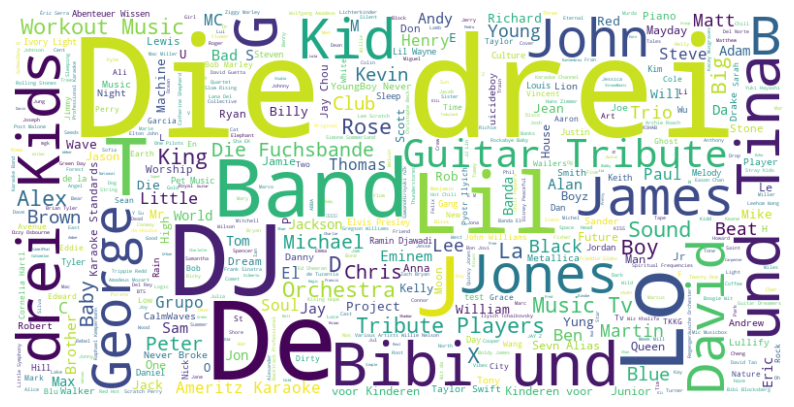

In [78]:
artists = ' '.join(df_eda['artist_name'])
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(artists)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2. Biểu diễn album_name

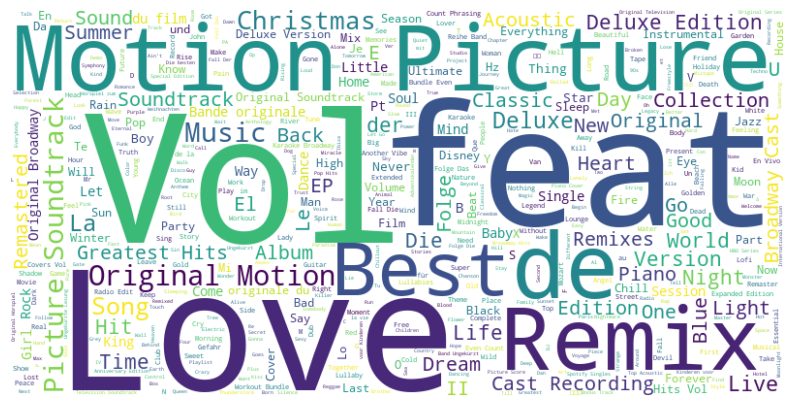

In [79]:
album = ' '.join(df_eda['album_name'])
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(album)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 3. Biểu diễn thể loại (genre)

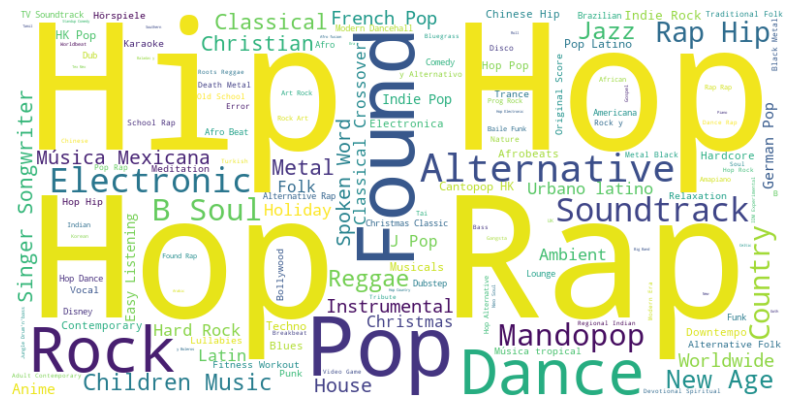

In [80]:
genre = ' '.join(df_eda['genre'])
wordcloud = WordCloud(width=800, height=400, max_words=500, background_color='white').generate(genre)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## II. Phân tích dữ liệu

#### Phần 1: Các câu hỏi cho tổng quan dữ liệu

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [82]:
df_eda

,track_name,artist_name,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,release_date,genre
0,Creature,Asking Alexandria,From Death To Destiny,0.476,0.940,4,-3.720,0,0.0669,0.000088,0.000255,0.1120,0.461,75.990,194210,4,0,2013-08,Metal
1,Saviour (feat. First Aid Kit),George Ezra,Saviour (feat. First Aid Kit),0.582,0.783,7,-6.437,0,0.0633,0.050500,0.000016,0.2440,0.187,101.009,212274,4,0,2018-03,Singer/Songwriter
2,You Don't Know,Katelyn Tarver,Tired Eyes,0.560,0.315,10,-8.532,0,0.0500,0.734000,0.000001,0.1050,0.138,78.060,260851,4,0,2017-03,Pop
3,Indoor Kid,Sløtface,AWAKE/ASLEEP,0.817,0.615,0,-9.776,1,0.2310,0.201000,0.000012,0.1240,0.570,127.926,170625,4,7,2023-02,Indie Rock
4,Copper & Hippie,康姆士(COM’Z),康姆士（COM'Z）,0.637,0.640,6,-3.651,0,0.0298,0.285000,0.000000,0.0945,0.386,110.003,273640,4,1,2014-04,Mandopop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PUSH 2 START,Tyla,TYLA +,0.683,0.814,2,-3.505,1,0.0466,0.277000,0.008260,0.0858,0.758,93.482,156825,4,81,2024-10,Pop
9996,MILLION DOLLAR BABY,Tommy Richman,MILLION DOLLAR BABY,0.852,0.697,1,-5.520,0,0.0439,0.097300,0.000370,0.0678,0.919,138.029,155151,4,88,2024-04,Dance
9997,Slow It Down,Benson Boone,Fireworks & Rollerblades,0.432,0.583,8,-4.682,1,0.0687,0.174000,0.000000,0.0933,0.544,181.489,161831,4,85,2024-04,Pop
9998,"Paint It, Black",The Rolling Stones,Aftermath,0.464,0.795,1,-9.267,1,0.0926,0.049300,0.002440,0.3990,0.612,158.691,202266,4,81,1966-04,Pop Latino


##### 1) Top 10 nghệ sĩ có nhiều bài hát nhất

In [83]:
top_artists = df_eda['artist_name'].value_counts().head(10)

fig = go.Figure(data=[
    go.Bar(x=top_artists.index, y=top_artists.values, marker=dict(color='skyblue'))
])

fig.update_layout(title_text='Top 10 Nghệ Sĩ Có Nhiều Bài Hát Nhất',
                  xaxis_title='Nghệ sĩ',
                  yaxis_title='Số lượng bài hát',
                  template='plotly_dark', title_x=0.5)
fig.show()


##### 2) Xu hướng phát hành bài hát qua thời gian

In [84]:
df_eda['release_year'] = df_eda['release_date'].dt.year

In [85]:
df_eda['release_year'].value_counts().sort_index()

release_year
1936       2
1950       1
1952       1
1954       3
1955       1
        ... 
2020     711
2021     806
2022     882
2023    1062
2024    1660
Name: count, Length: 74, dtype: int64

In [86]:
df_eda['decade'] = (df_eda['release_year'] // 10) * 10

release_trends_decade = df_eda['decade'].value_counts().sort_index()

fig = go.Figure(data=[
    go.Scatter(x=release_trends_decade.index.astype(str), y=release_trends_decade.values, mode='lines+markers', line=dict(color='skyblue'))
])

fig.update_layout(
    title_text='Xu Hướng Phát Hành Bài Hát Qua Các Thập Kỷ',
    xaxis_title='Thập kỷ',
    yaxis_title='Số lượng bài hát phát hành',
    template='plotly_dark', 
    title_x=0.5,  
    xaxis=dict(tickangle=0),  
)

fig.show()

Ta có nhận xét: ngày càng nhiều bài hát được phát hành theo thời gian, thể hiện lĩnh vực âm nhạc ngày càng phát triển và được ưa chuộng.

##### 3) Phân bố các thể loại nhạc (Top 10 thể loại phổ biến nhất)

In [87]:
top_genres = df_eda['genre'].value_counts().head(10)

fig = go.Figure(data=[
    go.Bar(x=top_genres.index, y=top_genres.values, marker=dict(color='skyblue'))
])

fig.update_layout(title_text='Top 10 Thể Loại Nhạc Phổ Biến Nhất',
                  xaxis_title='Thể loại nhạc',
                  yaxis_title='Số lượng bài hát',
                  template='plotly_dark', title_x=0.5)
fig.show()


Nhận xét: thể loại Hip-Hop/Rap và Pop là 2 thể loại phổ biến nhất, đặc biệt là Hip-Hope/Rap có lịch sử phát triển rất lâu đời. Gần đây tại Việt Nam, thể loại Hip-Hop/Rap rất phát triển và được các bạn trẻ ưa chuộng.

##### 4) Thời lượng các bài nhạc qua từng năm

In [88]:
df_filtered = df_eda[df_eda['release_year'] >= 2000]

duration_per_month = df_filtered.groupby('release_year')['duration_ms'].mean().sort_index()

months = duration_per_month.index.astype(str)
values = duration_per_month.values

fig = go.Figure(data=[
    go.Scatter(x=months, y=values, mode='lines+markers', 
               line=dict(width=2), marker=dict(size=6, color='skyblue'))
])

fig.update_layout(title_text='Xu Hướng Phân Bố Thời Lượng Bài Hát Qua Thời Gian (Từ 2000 Đến Nay)',
                  xaxis_title='Thời gian (Năm)',
                  yaxis_title='Thời lượng trung bình (ms)',
                  template='plotly_dark', title_x=0.5, xaxis=dict(tickangle=30))

fig.show()

Xu hướng giảm dần thời lượng bài hát:
- Từ năm 2000 đến 2024, thời lượng trung bình của các bài hát có xu hướng giảm dần rõ rệt.
- Vào giai đoạn đầu những năm 2000, thời lượng trung bình duy trì ở mức cao, khoảng 240.000 ms (240 giây - tương đương 4 phút).
- Sau năm 2014, thời lượng bài hát giảm nhanh và liên tục, đặc biệt trong giai đoạn 2019 - 2023.

Điều này hoàn toàn hợp lý vì giới trẻ hiện nay ưu tiên phát hành những bài hát nhanh, có thể dùng trong các nền tảng mạng xã hội như TikTok...


#### Phần 2: Các câu hỏi thể hiện mối quan hệ và ảnh hưởng đến độ yêu thích(popularity) của bài hát

##### 1) Mối quan hệ giữa popularity và các đặc tính âm nhạc (danceability, energy, valence, tempo, loudness)

Text(0.5, 1.0, 'Ma trận tương quan giữa các biến số')

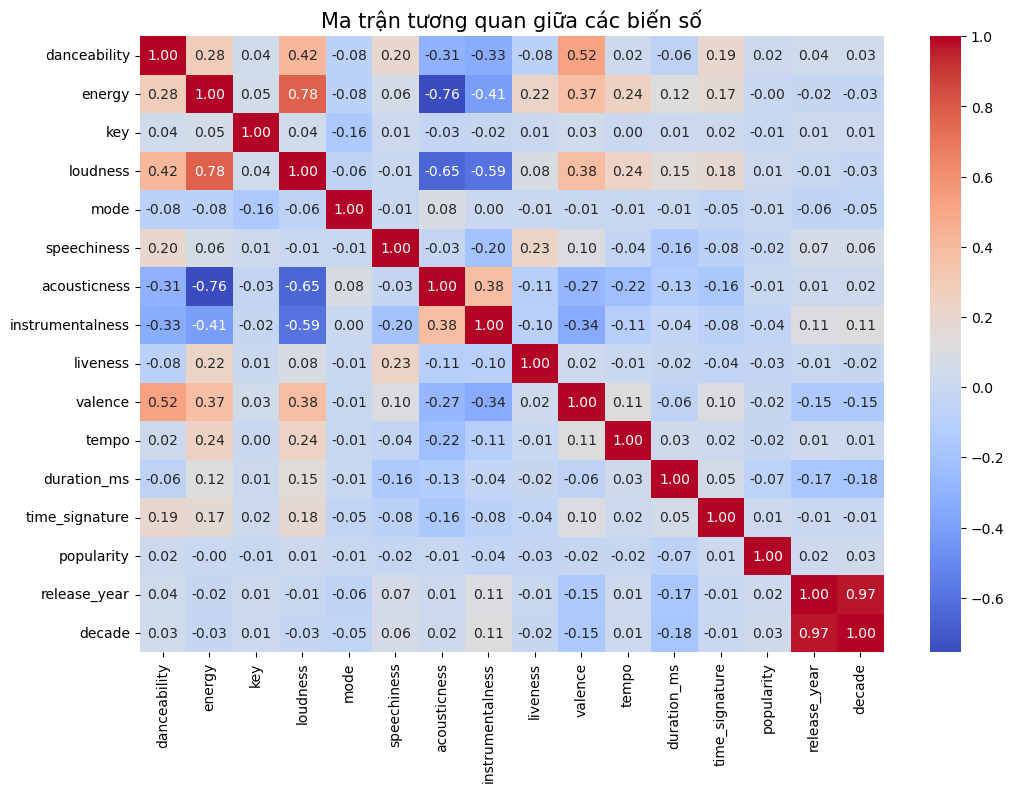

In [89]:
# Tính ma trận tương quan
numerical_columns = df_eda.select_dtypes(include=['number']).columns
corr = df_eda[numerical_columns].corr()
# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các biến số', fontsize=15)


Ta nhận thấy từng đặc trưng riêng lẻ của bài nhạc không có tương quan cao với độ nổi tiếng (popularity) của bài nhạc đó. Tuy nhiên nếu ta kết hợp các chỉ số này lại nó chắc chắn sẽ là yếu tố quan trọng ảnh hưởng đến độ nổi tiếng.

##### 2) Xu hướng popularity của bài hát theo thời gian

In [90]:
popularity_per_month = df_eda[df_eda['release_year']>= 2000].groupby('release_year')['popularity'].mean().sort_index()

months = popularity_per_month.index.astype(str)
values = popularity_per_month.values
fig = go.Figure(data=[
    go.Scatter(x=months, y=values, mode='lines+markers',
               line=dict(width=2, color='skyblue'), marker=dict(size=6))
])

fig.update_layout(title_text='Xu Hướng Độ Yêu Thích (Popularity) Của Bài Hát Theo Thời Gian',
                  xaxis_title='Thời gian (Năm)',
                  yaxis_title='Popularity Trung Bình',
                  template='plotly_dark', title_x=0.5)
fig.show()

Câu hỏi: Các bài hát mới hơn có được ưa chuộng hơn không?

Xu hướng tăng dần trong độ yêu thích của các bài hát gần đây (2020 - 2024) cho thấy sự ưa chuộng ngày càng lớn đối với các tác phẩm âm nhạc mới.

##### 3) Phân Bố Popularity Theo Thể Loại Nhạc

In [91]:
top_genres = df_eda['genre'].value_counts().head(10).index  # Chọn top 10 thể loại
filtered_df = df_eda[df_eda['genre'].isin(top_genres)]

fig = px.box(filtered_df, x='genre', y='popularity',
             title='Phân Bố Popularity Theo Thể Loại Nhạc',
             template='plotly_dark')
fig.update_traces(marker=dict(color='lightblue'))
fig.show()

Câu hỏi: Thể loại nhạc nào có bài hát được yêu thích nhất?

- Các thể loại Pop, Alternative, Hip-Hop/Rap, và Electronic có độ phổ biến cao nhất, thể hiện qua median (giá trị trung vị) và phân bố rộng hơn so với các thể loại khác.
- Mandopop có median (trung vị) thấp nhất, cho thấy các bài hát thuộc thể loại này ít phổ biến hơn.
- Pop và Hip-Hop/Rap có sự phân tán rộng nhất, với một số bài hát có popularity cao vượt trội (outliers).
Điều này phản ánh rằng các thể loại này có khả năng tạo ra nhiều bài hát hit hơn so với các thể loại khác.

##### 4) Mối quan hệ

In [92]:
fig = px.scatter(df_eda, x='duration_ms', y='popularity',
                 title='Mối Quan Hệ Giữa Popularity và Duration (Thời Lượng)',
                 template='plotly_dark', opacity=0.6)
fig.update_traces(marker=dict(size=5, color='green'))
fig.show()


Câu hỏi: Thời lượng bài hát có ảnh hưởng đến độ yêu thích của nó không?
- Thời lượng bài hát không có mối quan hệ tuyến tính rõ ràng với độ yêu thích.
- Tuy nhiên, các bài hát có thời lượng trung bình ngắn (2-4 phút) có xu hướng đạt độ phổ biến cao hơn.
- Các bài hát có thời lượng quá dài thường có độ phổ biến thấp.

##### 5) Top 10 bài hát có popularity cao nhất

In [93]:
top_songs = df_eda.nlargest(10, 'popularity')

fig = px.bar(top_songs, x='popularity', y='track_name',
             title='Top 10 Bài Hát Có Popularity Cao Nhất',
             orientation='h', template='plotly_dark', color='popularity')
fig.update_layout(yaxis=dict(title='Tên bài hát'), xaxis=dict(title='Popularity'))
fig.show()
